In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("diabetic_data.csv")

In [3]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
# Only required columns
selected_columns = [
    'race', 'gender', 'age',
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'time_in_hospital',
    'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses',
    'max_glu_serum', 'A1Cresult',
    'insulin', 'metformin', 'change', 'diabetesMed',
    'readmitted'
]

df = data[selected_columns].copy()

In [6]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,insulin,metformin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,0,0,1,None,None,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,0,0,9,None,None,Up,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,0,1,6,None,None,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,0,0,7,None,None,Up,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,0,0,5,None,None,Steady,No,Ch,Yes,NO


In [7]:
null_counts = df.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
insulin                     0
metformin                   0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  number_diagnoses          101766 non-null  int64 
 14  max_

In [9]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].unique()[:10])  # show only first 10 unique values


Column: race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

Column: gender
['Female' 'Male' 'Unknown/Invalid']

Column: age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

Column: max_glu_serum
['None' '>300' 'Norm' '>200']

Column: A1Cresult
['None' '>7' '>8' 'Norm']

Column: insulin
['No' 'Up' 'Steady' 'Down']

Column: metformin
['No' 'Steady' 'Up' 'Down']

Column: change
['No' 'Ch']

Column: diabetesMed
['No' 'Yes']

Column: readmitted
['NO' '>30' '<30']


In [10]:
df['readmitted'] = df['readmitted'].replace({'NO': 0, '>30': 1, '<30': 1})
df['A1Cresult'] = df['A1Cresult'].replace({'>8': 'High', '>7': 'Slightly High', 'Norm': 'Normal', 'None': 'Unknown'})
df['max_glu_serum'] = df['max_glu_serum'].replace({'>200': 'High', '>300': 'Very High', 'Norm': 'Normal', 'None': 'Unknown'})

In [11]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [12]:
df = df[df['race'] != '?']

In [13]:
df['gender'].value_counts()

Female             53575
Male               45917
Unknown/Invalid        1
Name: gender, dtype: int64

In [14]:
df = df[df['gender'] != 'Unknown/Invalid']

In [15]:
df['A1Cresult'].value_counts()

Unknown          82896
High              7961
Normal            4905
Slightly High     3730
Name: A1Cresult, dtype: int64

In [16]:
df['insulin'].value_counts()

No        46495
Steady    29902
Down      12039
Up        11056
Name: insulin, dtype: int64

In [17]:
df['metformin'].value_counts()

No        79971
Steady    17920
Up         1039
Down        562
Name: metformin, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99492 non-null  object
 1   gender                    99492 non-null  object
 2   age                       99492 non-null  object
 3   admission_type_id         99492 non-null  int64 
 4   discharge_disposition_id  99492 non-null  int64 
 5   admission_source_id       99492 non-null  int64 
 6   time_in_hospital          99492 non-null  int64 
 7   num_lab_procedures        99492 non-null  int64 
 8   num_procedures            99492 non-null  int64 
 9   num_medications           99492 non-null  int64 
 10  number_outpatient         99492 non-null  int64 
 11  number_emergency          99492 non-null  int64 
 12  number_inpatient          99492 non-null  int64 
 13  number_diagnoses          99492 non-null  int64 
 14  max_glu_serum        

In [19]:
df['readmitted'].value_counts()

0    53316
1    46176
Name: readmitted, dtype: int64

In [20]:
df.corr(numeric_only=True)

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
admission_type_id,1.000000,0.081921,0.108711,-0.012403,-0.142429,0.128789,0.079812,0.026707,-0.019491,-0.038240,-0.118788,-0.005525
discharge_disposition_id,0.081921,1.000000,0.016723,0.162856,0.022999,0.015106,0.107662,-0.009848,-0.025491,0.019551,0.042770,-0.016714
admission_source_id,0.108711,0.016723,1.000000,-0.007365,0.048743,-0.134201,-0.054900,0.025959,0.059503,0.035425,0.069813,0.037808
time_in_hospital,-0.012403,0.162856,-0.007365,1.000000,0.317656,0.193264,0.466394,-0.009546,-0.009801,0.073403,0.220671,0.051010
num_lab_procedures,-0.142429,0.022999,0.048743,0.317656,1.000000,0.058451,0.267013,-0.008562,-0.002231,0.039730,0.151565,0.038719
num_procedures,0.128789,0.015106,-0.134201,0.193264,0.058451,1.000000,0.385532,-0.024932,-0.038365,-0.065834,0.072380,-0.043862
num_medications,0.079812,0.107662,-0.054900,0.466394,0.267013,0.385532,1.000000,0.044530,0.012965,0.064997,0.258623,0.046485
number_outpatient,0.026707,-0.009848,0.025959,-0.009546,-0.008562,-0.024932,0.044530,1.000000,0.090941,0.106234,0.092455,0.080690
number_emergency,-0.019491,-0.025491,0.059503,-0.009801,-0.002231,-0.038365,0.012965,0.090941,1.000000,0.266382,0.054085,0.102484
number_inpatient,-0.038240,0.019551,0.035425,0.073403,0.039730,-0.065834,0.064997,0.106234,0.266382,1.000000,0.103245,0.216605


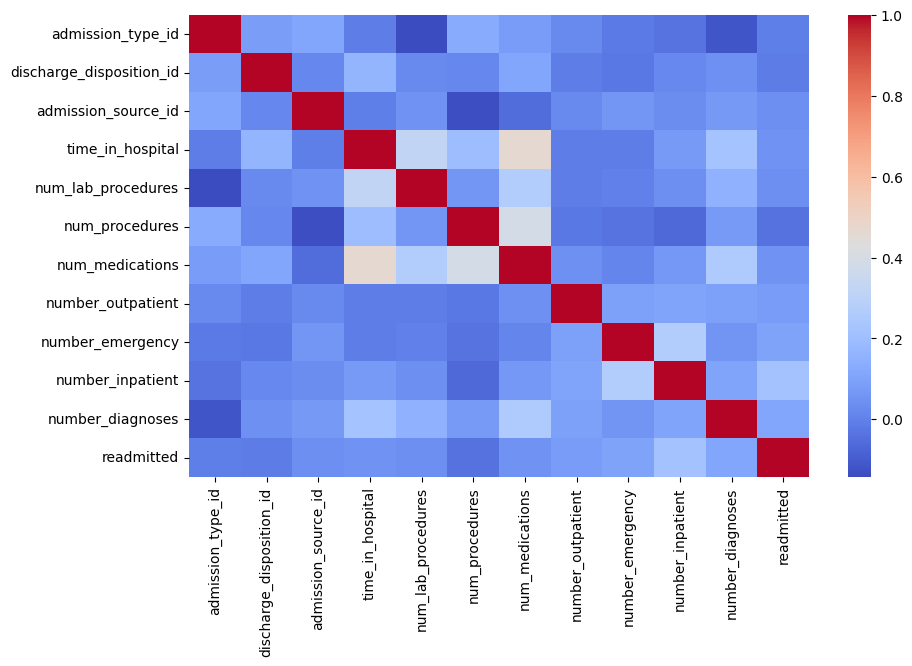

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.show()

<Axes: xlabel='age', ylabel='count'>

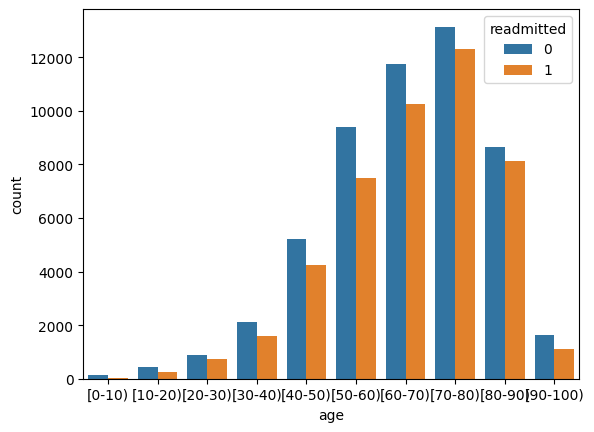

In [22]:
import seaborn as sns
sns.countplot(x='age', hue='readmitted', data=df)

<Axes: xlabel='readmitted', ylabel='time_in_hospital'>

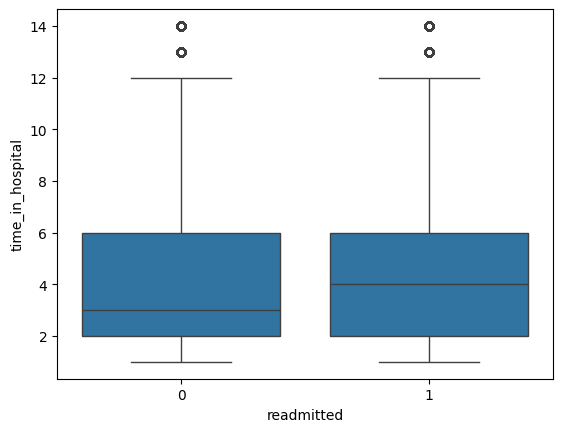

In [23]:
sns.boxplot(x='readmitted', y='time_in_hospital', data=df)

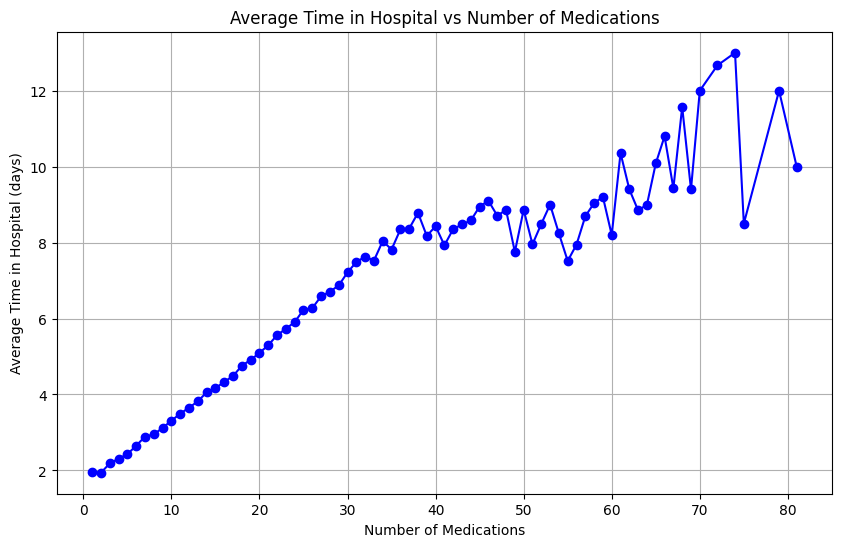

In [27]:
import matplotlib.pyplot as plt

# Aggregate data: average time_in_hospital for each num_medications
avg_stay = df.groupby('num_medications')['time_in_hospital'].mean()

# Plot
plt.figure(figsize=(10,6))
plt.plot(avg_stay.index, avg_stay.values, marker='o', color='blue')
plt.title('Average Time in Hospital vs Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Average Time in Hospital (days)')
plt.grid(True)
plt.show()

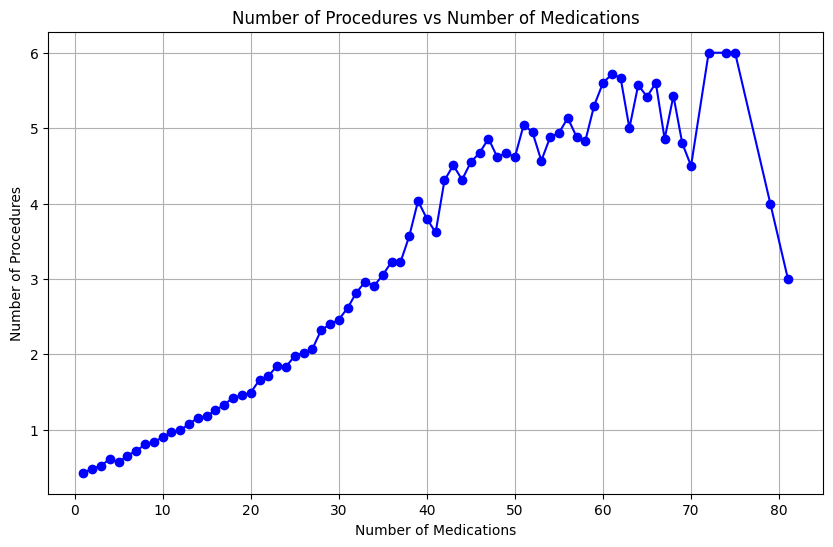

In [29]:
# Aggregate data: average time_in_hospital for each num_medications
avg_stay = df.groupby('num_medications')['num_procedures'].mean()

# Plot
plt.figure(figsize=(10,6))
plt.plot(avg_stay.index, avg_stay.values, marker='o', color='blue')
plt.title('Number of Procedures vs Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Number of Procedures')
plt.grid(True)
plt.show()

In [30]:
# Count of readmissions by race
race_readmission = df.groupby('race')['readmitted'].value_counts()
print(race_readmission)

race             readmitted
AfricanAmerican  0             10421
                 1              8789
Asian            0               415
                 1               226
Caucasian        0             40383
                 1             35716
Hispanic         0              1183
                 1               854
Other            0               914
                 1               591
Name: readmitted, dtype: int64


In [31]:
gender_readmission = df.groupby('gender')['readmitted'].value_counts()
print(gender_readmission)

gender  readmitted
Female  0             28257
        1             25318
Male    0             25059
        1             20858
Name: readmitted, dtype: int64


In [32]:
# Crosstab for race vs readmitted
pd.crosstab(df['race'], df['readmitted'])

readmitted,0,1
race,,
AfricanAmerican,10421,8789
Asian,415,226
Caucasian,40383,35716
Hispanic,1183,854
Other,914,591


In [33]:
# For gender
pd.crosstab(df['gender'], df['readmitted'])

readmitted,0,1
gender,,
Female,28257,25318
Male,25059,20858


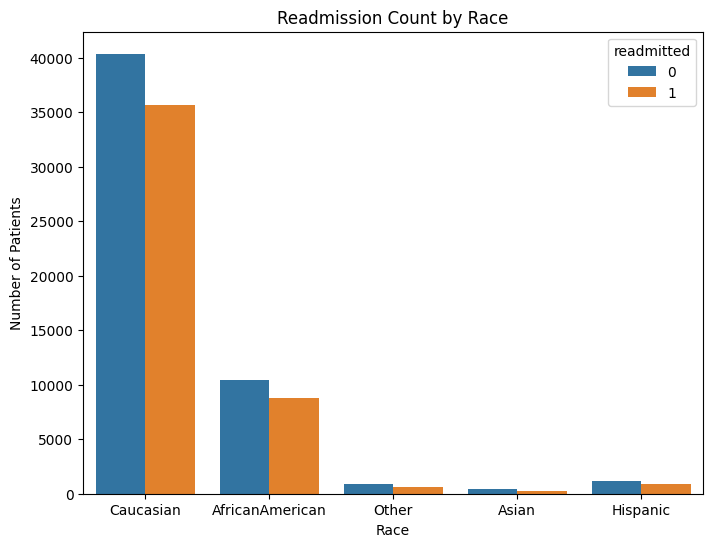

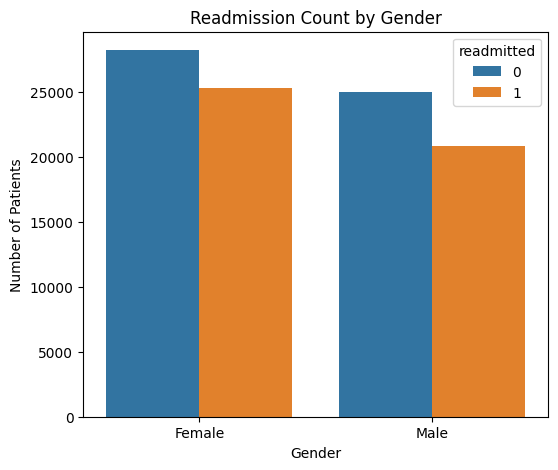

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for race
plt.figure(figsize=(8,6))
sns.countplot(x='race', hue='readmitted', data=df)
plt.title('Readmission Count by Race')
plt.xlabel('Race')
plt.ylabel('Number of Patients')
plt.show()

# Count plot for gender
plt.figure(figsize=(6,5))
sns.countplot(x='gender', hue='readmitted', data=df)
plt.title('Readmission Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()